In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [92]:
### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

# slice dataset up to attack flag column, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


-1    149915
 1     67713
Name: attack_flag, dtype: int64

In [93]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,-1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,-1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,10106,17989,udp


In [94]:
data.shape

(217628, 18)

In [95]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,-0.377718,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.925923,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [97]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [98]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [99]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

In [100]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [101]:
data.shape

(217628, 42)

In [102]:
# removing NaNs
data = data.dropna()

In [103]:
data.shape

(217628, 42)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 42 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

## Data visualization

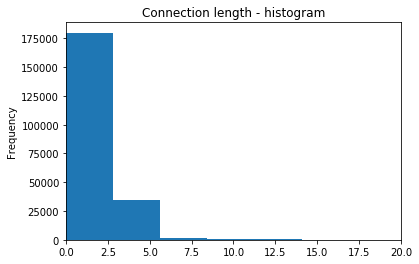

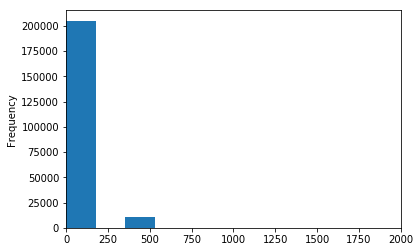

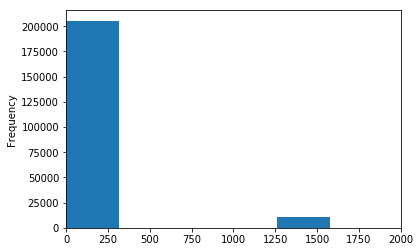

In [105]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=200, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,2000])
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000])
plt.show()

Text(0.5,0.98,'')

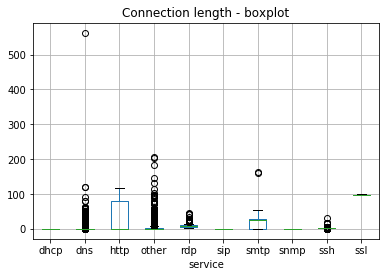

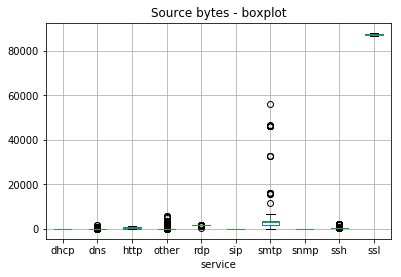

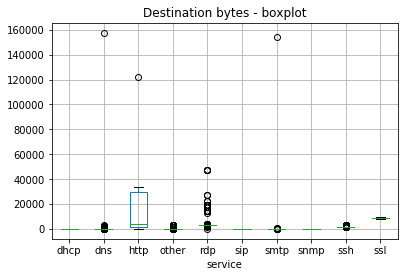

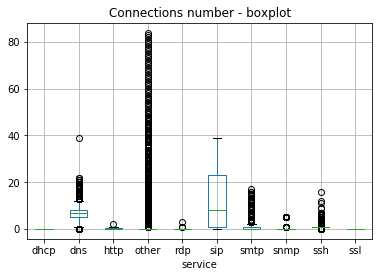

In [106]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

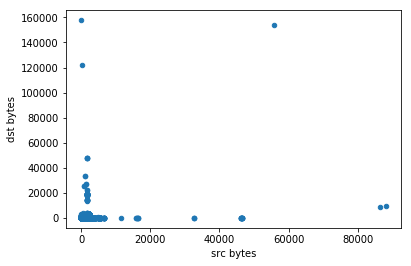

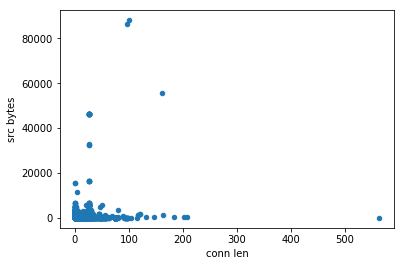

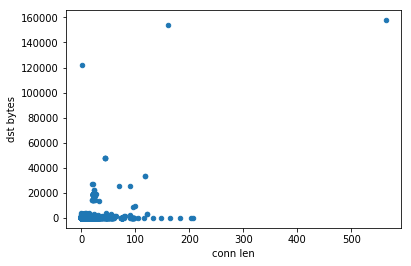

In [107]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [108]:
### drop categorical columns ####

data = data.drop(["service", "Conn state", "proto"], axis=1)

# Training and testing set preparation

In [109]:
data.shape

(217628, 39)

In [110]:
### training dataset - make the dataset binary one ###
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1

In [111]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(7, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

sampled_data = data.sample(n=10000, random_state=1)


X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
y = sampled_data.loc[:, sampled_data.columns == 'attack_flag'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


seed = 12

print(Counter(y_test))
print(Counter(y_train))

Counter({1: 2083, -1: 917})
Counter({1: 4838, -1: 2162})


# Decision Tree parameters selection

## Checking different parameters impact

In [113]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_5":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 5),
               "DecisionTree_ent_7":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 7),
               "DecisionTree_5":DecisionTreeClassifier(random_state=0, max_depth = 5),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "DecisionTree_ent":DecisionTreeClassifier(random_state=0, criterion = "entropy")

}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99467, F1-score: 0.99615, Precision: 0.99807, Recall: 0.99424, FPR: 0.00436
TN: 913; FP:   4; FN:   12; TP: 2071

Algorithm: DecisionTree_ent_5 Accuracy: 0.99767, F1-score: 0.99832, Precision: 0.99856, Recall: 0.99808, FPR: 0.00327
TN: 914; FP:   3; FN:    4; TP: 2079

Algorithm: DecisionTree_ent_7 Accuracy: 0.99767, F1-score: 0.99832, Precision: 0.99808, Recall: 0.99856, FPR: 0.00436
TN: 913; FP:   4; FN:    3; TP: 2080

Algorithm: DecisionTree_5 Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99856, Recall: 0.99904, FPR: 0.00327
TN: 914; FP:   3; FN:    2; TP: 2081

Algorithm: DecisionTree_7 Accuracy: 0.99667, F1-score: 0.99760, Precision: 0.99808, Recall: 0.99712, FPR: 0.00436
TN: 913; FP:   4; FN:    6; TP: 2077

Algorithm: DecisionTree_ent Accuracy: 0.99600, F1-score: 0.99712, Precision: 0.99808, Recall: 0.99616, FPR: 0.00436
TN: 913; FP:   4; FN:    8; TP: 2075



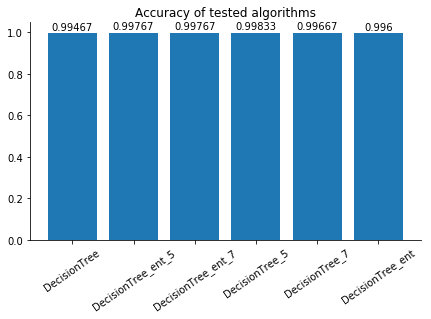

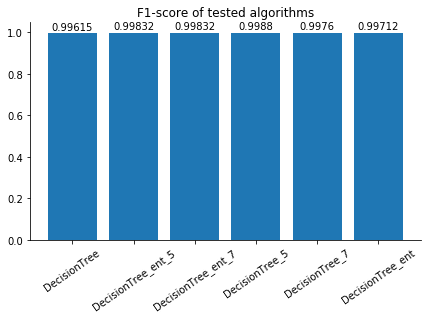

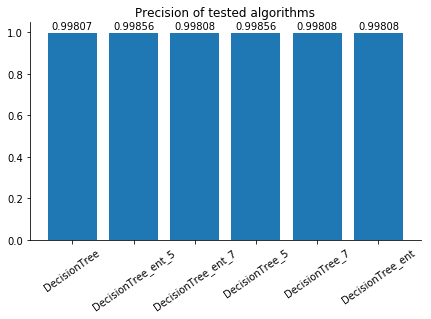

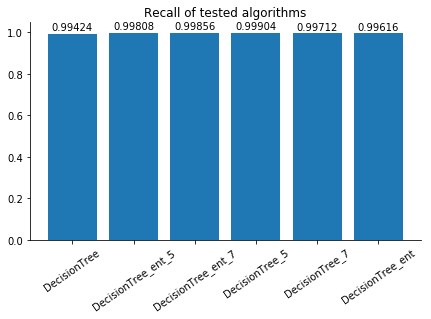

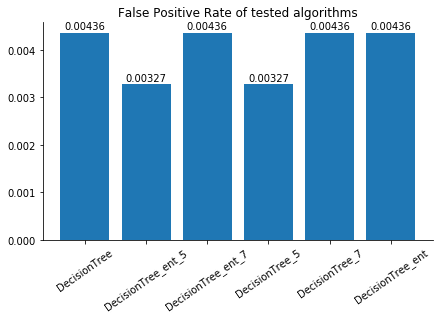

In [114]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Checking tree depth impact

In [115]:
# plotting method definition

def plot_stats2(stat, name):
    fig, ax = plt.subplots(figsize=(8, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=55)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [116]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}


for depth in range(1,11):

    classifiers = {
                   "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = depth)
    }



    #for name, clf in classifiers.items():
    name = "DCT" + "_" + str(depth)
    model = classifiers["DecisionTree"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DCT_1        Accuracy: 0.98500, F1-score: 0.98927, Precision: 0.98248, Recall: 0.99616, FPR: 0.04035
TN: 880; FP:  37; FN:    8; TP: 2075

Algorithm: DCT_2        Accuracy: 0.98633, F1-score: 0.99024, Precision: 0.98251, Recall: 0.99808, FPR: 0.04035
TN: 880; FP:  37; FN:    4; TP: 2079

Algorithm: DCT_3        Accuracy: 0.99300, F1-score: 0.99494, Precision: 0.99855, Recall: 0.99136, FPR: 0.00327
TN: 914; FP:   3; FN:   18; TP: 2065

Algorithm: DCT_4        Accuracy: 0.99600, F1-score: 0.99712, Precision: 0.99856, Recall: 0.99568, FPR: 0.00327
TN: 914; FP:   3; FN:    9; TP: 2074

Algorithm: DCT_5        Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99856, Recall: 0.99904, FPR: 0.00327
TN: 914; FP:   3; FN:    2; TP: 2081

Algorithm: DCT_6        Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99856, Recall: 0.99904, FPR: 0.00327
TN: 914; FP:   3; FN:    2; TP: 2081

Algorithm: DCT_7        Accuracy: 0.99667, F1-score: 0.99760, Precision: 0.99808, Recall: 0.99712, F

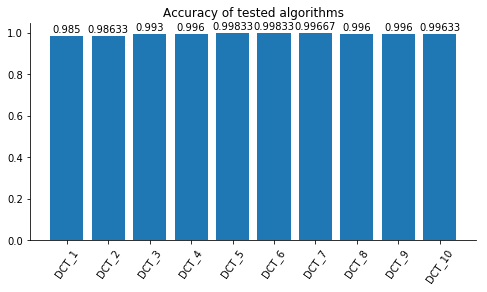

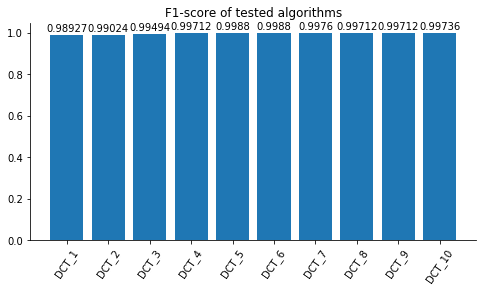

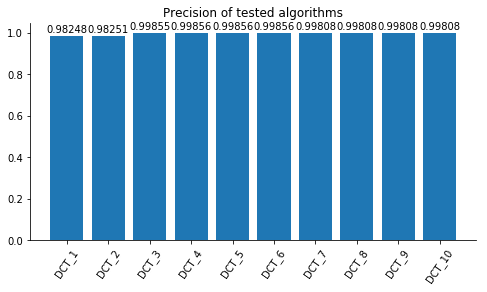

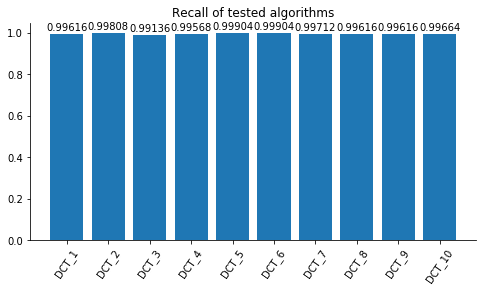

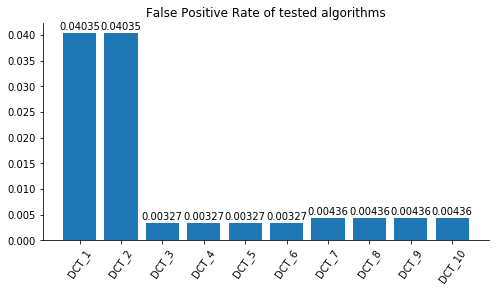

In [117]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt


# zmiana n_estimators daje poprawe
# kfold tylko dla crossvalidation
# learning rate [1 - default] najlepsze wyniki

classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: DecisionTree Accuracy: 0.99467, F1-score: 0.99615, Precision: 0.99807, Recall: 0.99424, FPR: 0.00436
TN: 913; FP:   4; FN:   12; TP: 2071

Algorithm: DecisionTree_7 Accuracy: 0.99667, F1-score: 0.99760, Precision: 0.99808, Recall: 0.99712, FPR: 0.00436
TN: 913; FP:   4; FN:    6; TP: 2077



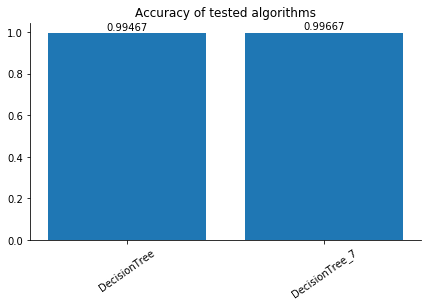

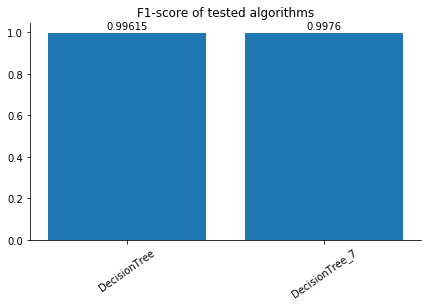

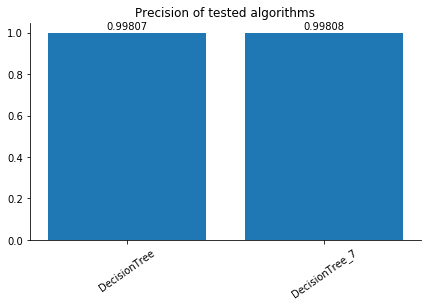

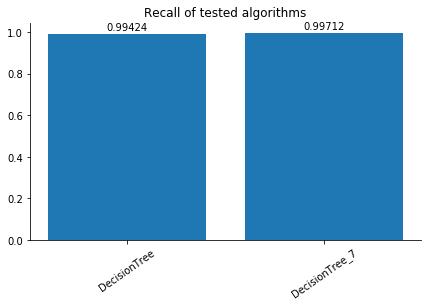

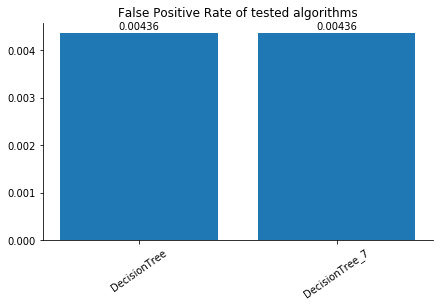

In [119]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## AdaBoost parameters selection

In [120]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7, random_state=0), n_estimators=num_trees),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "Adaboost" + "_" + str(num_trees)
    model = classifiers["AdaBoost"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: Adaboost_2   Accuracy: 0.99533, F1-score: 0.99663, Precision: 0.99807, Recall: 0.99520, FPR: 0.00436
TN: 913; FP:   4; FN:   10; TP: 2073

Algorithm: Adaboost_12  Accuracy: 0.99700, F1-score: 0.99784, Precision: 0.99712, Recall: 0.99856, FPR: 0.00654
TN: 911; FP:   6; FN:    3; TP: 2080

Algorithm: Adaboost_22  Accuracy: 0.99733, F1-score: 0.99808, Precision: 0.99760, Recall: 0.99856, FPR: 0.00545
TN: 912; FP:   5; FN:    3; TP: 2080

Algorithm: Adaboost_32  Accuracy: 0.99767, F1-score: 0.99832, Precision: 0.99760, Recall: 0.99904, FPR: 0.00545
TN: 912; FP:   5; FN:    2; TP: 2081

Algorithm: Adaboost_42  Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, FPR: 0.00436
TN: 913; FP:   4; FN:    1; TP: 2082

Algorithm: Adaboost_52  Accuracy: 0.99733, F1-score: 0.99808, Precision: 0.99760, Recall: 0.99856, FPR: 0.00545
TN: 912; FP:   5; FN:    3; TP: 2080

Algorithm: Adaboost_62  Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, F

In [121]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "AdaBoost":AdaBoostClassifier(n_estimators=num_trees),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "Adaboost" + "_" + str(num_trees)
    model = classifiers["AdaBoost"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: Adaboost_2   Accuracy: 0.98500, F1-score: 0.98927, Precision: 0.98248, Recall: 0.99616, FPR: 0.04035
TN: 880; FP:  37; FN:    8; TP: 2075

Algorithm: Adaboost_12  Accuracy: 0.99533, F1-score: 0.99664, Precision: 0.99712, Recall: 0.99616, FPR: 0.00654
TN: 911; FP:   6; FN:    8; TP: 2075

Algorithm: Adaboost_22  Accuracy: 0.99300, F1-score: 0.99496, Precision: 0.99472, Recall: 0.99520, FPR: 0.01200
TN: 906; FP:  11; FN:   10; TP: 2073

Algorithm: Adaboost_32  Accuracy: 0.99567, F1-score: 0.99688, Precision: 0.99664, Recall: 0.99712, FPR: 0.00763
TN: 910; FP:   7; FN:    6; TP: 2077

Algorithm: Adaboost_42  Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, FPR: 0.00436
TN: 913; FP:   4; FN:    1; TP: 2082

Algorithm: Adaboost_52  Accuracy: 0.99733, F1-score: 0.99808, Precision: 0.99808, Recall: 0.99808, FPR: 0.00436
TN: 913; FP:   4; FN:    4; TP: 2079

Algorithm: Adaboost_62  Accuracy: 0.99800, F1-score: 0.99856, Precision: 0.99856, Recall: 0.99856, F

In [122]:
num_trees = 122

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99800, F1-score: 0.99856, Precision: 0.99808, Recall: 0.99904, FPR: 0.00436
TN: 913; FP:   4; FN:    2; TP: 2081

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99767, F1-score: 0.99832, Precision: 0.99713, Recall: 0.99952, FPR: 0.00654
TN: 911; FP:   6; FN:    1; TP: 2082

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, FPR: 0.00436
TN: 913; FP:   4; FN:    1; TP: 2082

Algorithm: AdaBoost_n_est Accuracy: 0.99800, F1-score: 0.99856, Precision: 0.99808, Recall: 0.99904, FPR: 0.00436
TN: 913; FP:   4; FN:    2; TP: 2081

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99800, F1-score: 0.99856, Precision: 0.99808, Recall: 0.99904, FPR: 0.00436
TN: 913; FP:   4; FN:    2; TP: 2081

Algorithm: AdaBoost_orig Accuracy: 0.99733, F1-score: 0.99808, Precision: 0.99808, Recall: 0.99808, FPR: 0.00436
TN: 913; FP:   4; FN:    4; TP: 2079



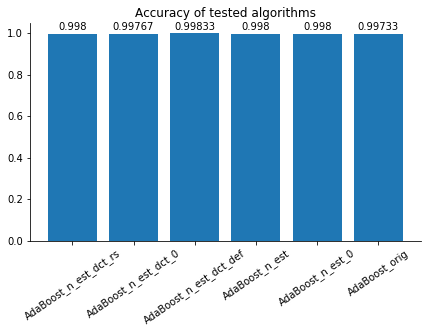

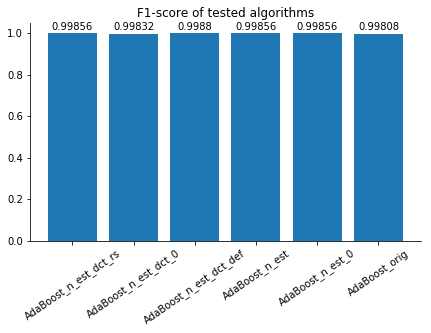

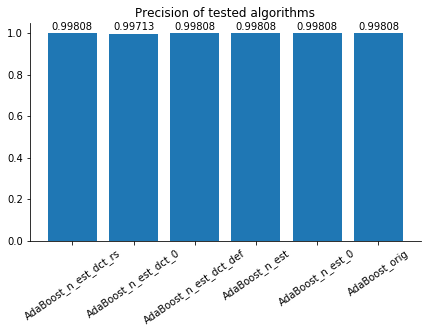

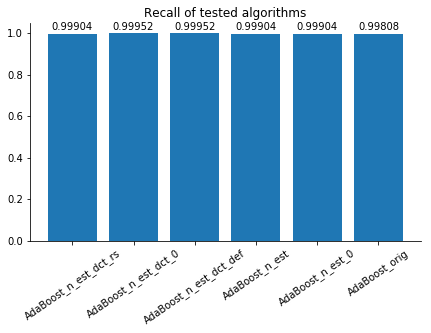

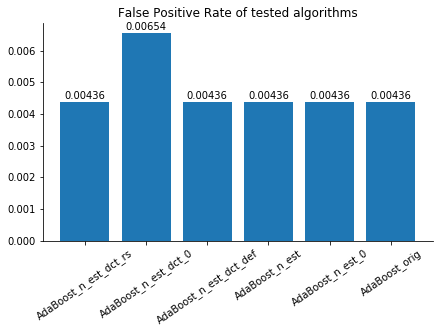

In [123]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Random tree parameters selection

In [124]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}


for depth in range(1,31):

    classifiers = {

                   "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = depth)
    }



    #for name, clf in classifiers.items():
    name = "RT" + "_" + str(depth)
    model = classifiers["RandomTree"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RT_1         Accuracy: 0.98100, F1-score: 0.98638, Precision: 0.98192, Recall: 0.99088, FPR: 0.04144
TN: 879; FP:  38; FN:   19; TP: 2064

Algorithm: RT_2         Accuracy: 0.98333, F1-score: 0.98807, Precision: 0.98198, Recall: 0.99424, FPR: 0.04144
TN: 879; FP:  38; FN:   12; TP: 2071

Algorithm: RT_3         Accuracy: 0.98400, F1-score: 0.98857, Precision: 0.98109, Recall: 0.99616, FPR: 0.04362
TN: 877; FP:  40; FN:    8; TP: 2075

Algorithm: RT_4         Accuracy: 0.98667, F1-score: 0.99036, Precision: 0.99419, Recall: 0.98656, FPR: 0.01309
TN: 905; FP:  12; FN:   28; TP: 2055

Algorithm: RT_5         Accuracy: 0.99267, F1-score: 0.99471, Precision: 0.99567, Recall: 0.99376, FPR: 0.00981
TN: 908; FP:   9; FN:   13; TP: 2070

Algorithm: RT_6         Accuracy: 0.99433, F1-score: 0.99591, Precision: 0.99807, Recall: 0.99376, FPR: 0.00436
TN: 913; FP:   4; FN:   13; TP: 2070

Algorithm: RT_7         Accuracy: 0.99233, F1-score: 0.99446, Precision: 0.99710, Recall: 0.99184, F

In [125]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.99200, F1-score: 0.99423, Precision: 0.99662, Recall: 0.99184, FPR: 0.00763
TN: 910; FP:   7; FN:   17; TP: 2066

Algorithm: RandomTree_21 Accuracy: 0.99200, F1-score: 0.99423, Precision: 0.99662, Recall: 0.99184, FPR: 0.00763
TN: 910; FP:   7; FN:   17; TP: 2066



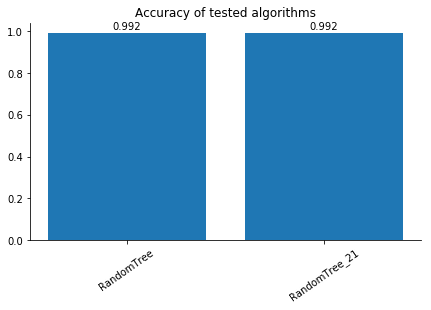

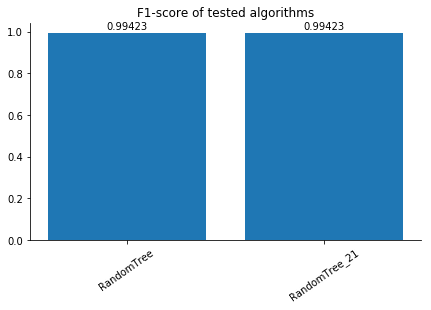

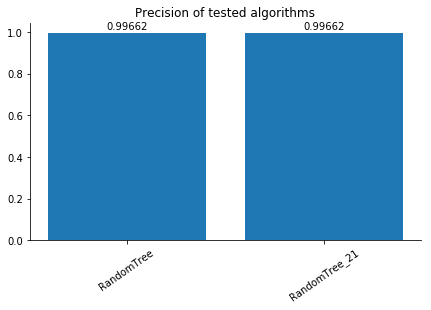

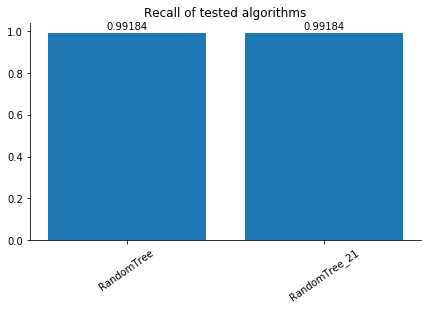

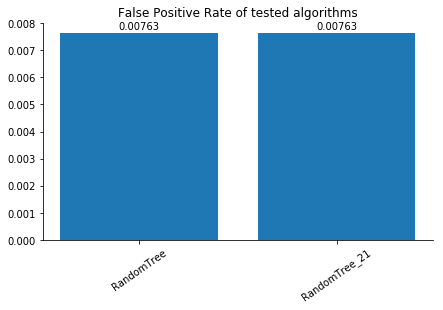

In [126]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Random Forest parameters selection

In [127]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "RandomForest":RandomForestClassifier(n_estimators=num_trees, random_state=0),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "RF" + "_" + str(num_trees)
    model = classifiers["RandomForest"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RF_2         Accuracy: 0.99233, F1-score: 0.99445, Precision: 0.99903, Recall: 0.98992, FPR: 0.00218
TN: 915; FP:   2; FN:   21; TP: 2062

Algorithm: RF_12        Accuracy: 0.99767, F1-score: 0.99832, Precision: 0.99856, Recall: 0.99808, FPR: 0.00327
TN: 914; FP:   3; FN:    4; TP: 2079

Algorithm: RF_22        Accuracy: 0.99800, F1-score: 0.99856, Precision: 0.99808, Recall: 0.99904, FPR: 0.00436
TN: 913; FP:   4; FN:    2; TP: 2081

Algorithm: RF_32        Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, FPR: 0.00436
TN: 913; FP:   4; FN:    1; TP: 2082

Algorithm: RF_42        Accuracy: 0.99867, F1-score: 0.99904, Precision: 0.99856, Recall: 0.99952, FPR: 0.00327
TN: 914; FP:   3; FN:    1; TP: 2082

Algorithm: RF_52        Accuracy: 0.99900, F1-score: 0.99928, Precision: 0.99856, Recall: 1.00000, FPR: 0.00327
TN: 914; FP:   3; FN:    0; TP: 2083

Algorithm: RF_62        Accuracy: 0.99900, F1-score: 0.99928, Precision: 0.99856, Recall: 1.00000, F

In [128]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for depth in range(1,31):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "RandomForest":RandomForestClassifier(n_estimators=32, random_state=0, max_depth = depth),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "RF" + "_" + str(depth)
    model = classifiers["RandomForest"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RF_1         Accuracy: 0.98667, F1-score: 0.99039, Precision: 0.99087, Recall: 0.98992, FPR: 0.02072
TN: 898; FP:  19; FN:   21; TP: 2062

Algorithm: RF_2         Accuracy: 0.98367, F1-score: 0.98822, Precision: 0.98988, Recall: 0.98656, FPR: 0.02290
TN: 896; FP:  21; FN:   28; TP: 2055

Algorithm: RF_3         Accuracy: 0.99167, F1-score: 0.99401, Precision: 0.99282, Recall: 0.99520, FPR: 0.01636
TN: 902; FP:  15; FN:   10; TP: 2073

Algorithm: RF_4         Accuracy: 0.99567, F1-score: 0.99688, Precision: 0.99664, Recall: 0.99712, FPR: 0.00763
TN: 910; FP:   7; FN:    6; TP: 2077

Algorithm: RF_5         Accuracy: 0.99633, F1-score: 0.99736, Precision: 0.99664, Recall: 0.99808, FPR: 0.00763
TN: 910; FP:   7; FN:    4; TP: 2079

Algorithm: RF_6         Accuracy: 0.99767, F1-score: 0.99832, Precision: 0.99760, Recall: 0.99904, FPR: 0.00545
TN: 912; FP:   5; FN:    2; TP: 2081

Algorithm: RF_7         Accuracy: 0.99800, F1-score: 0.99856, Precision: 0.99760, Recall: 0.99952, F

In [129]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

num_trees = 182
seed = 12

classifiers = {
                "RandomForest":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0),
                "RandomForest_orig":RandomForestClassifier(),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, FPR: 0.00436
TN: 913; FP:   4; FN:    1; TP: 2082

Algorithm: RandomForest_orig Accuracy: 0.99833, F1-score: 0.99880, Precision: 0.99808, Recall: 0.99952, FPR: 0.00436
TN: 913; FP:   4; FN:    1; TP: 2082



/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


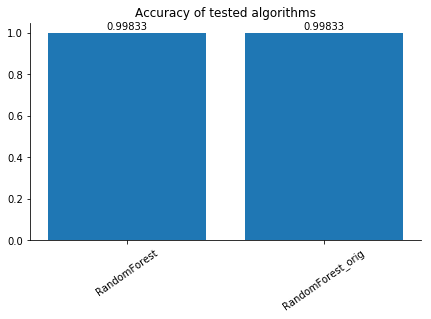

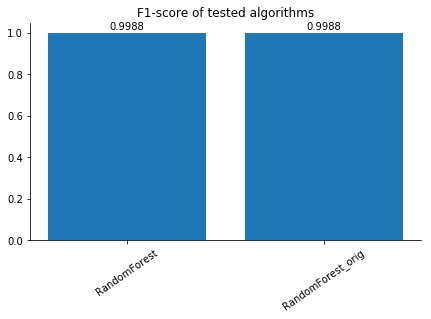

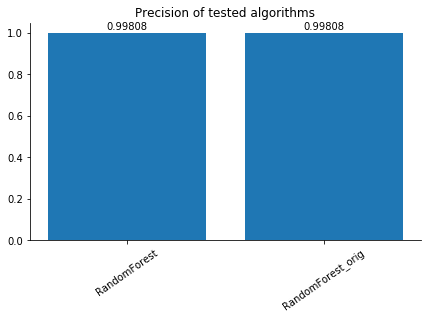

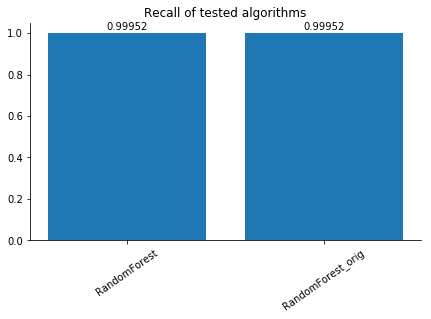

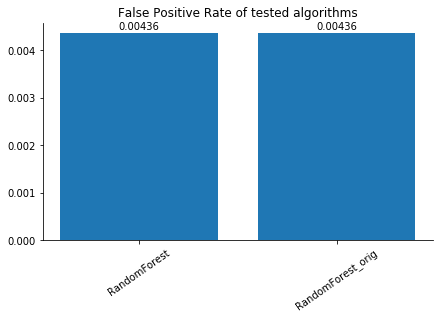

In [130]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

# Algorithms' performance comparison

In [131]:
sampled_data = data.sample(n=10000, random_state=1)


X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
y = sampled_data.loc[:, sampled_data.columns == 'attack_flag'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


seed = 12

print(Counter(y_test))
print(Counter(y_train))

Counter({1: 2097, -1: 903})
Counter({1: 4824, -1: 2176})


In [132]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

num_trees = 182
seed = 12

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=182, random_state=seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
               "RandomForest":RandomForestClassifier(),
               "RandomForest_np":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0)
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.99400, F1-score: 0.99572, Precision: 0.99382, Recall: 0.99762, FPR: 0.01440
TN: 890; FP:  13; FN:    5; TP: 2092

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99600, F1-score: 0.99714, Precision: 0.99525, Recall: 0.99905, FPR: 0.01107
TN: 893; FP:  10; FN:    2; TP: 2095

Algorithm: DecisionTree Accuracy: 0.99267, F1-score: 0.99475, Precision: 0.99475, Recall: 0.99475, FPR: 0.01218
TN: 892; FP:  11; FN:   11; TP: 2086

Algorithm: DecisionTree_7 Accuracy: 0.99533, F1-score: 0.99667, Precision: 0.99572, Recall: 0.99762, FPR: 0.00997
TN: 894; FP:   9; FN:    5; TP: 2092

Algorithm: NaiveBayes   Accuracy: 0.97900, F1-score: 0.98508, Precision: 0.97836, Recall: 0.99189, FPR: 0.05094
TN: 857; FP:  46; FN:   17; TP: 2080

Algorithm: RandomTree   Accuracy: 0.99167, F1-score: 0.99405, Precision: 0.99240, Recall: 0.99571, FPR: 0.01772
TN: 887; FP:  16; FN:    9; TP: 2088

Algorithm: RandomTree_21 Accuracy: 0.99167, F1-score: 0.99405, Precision: 0.99240, Recall: 0.9

/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


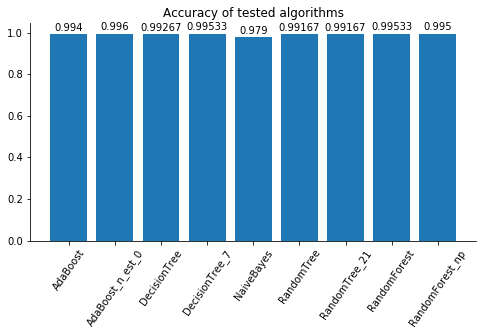

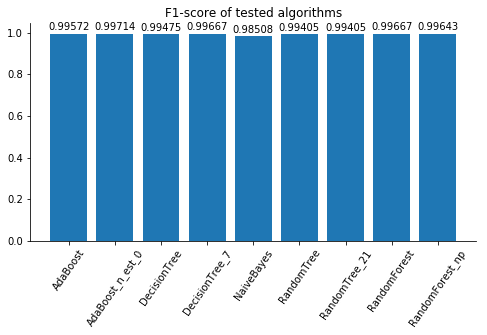

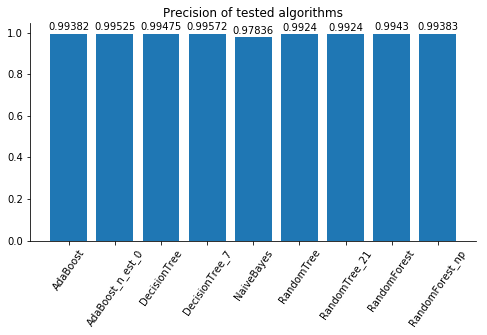

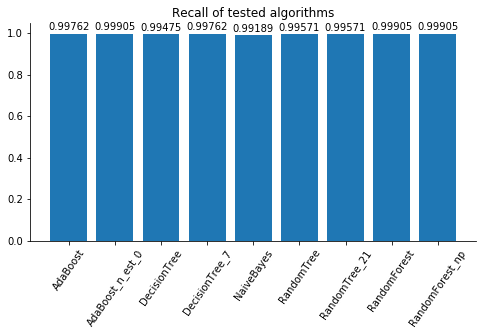

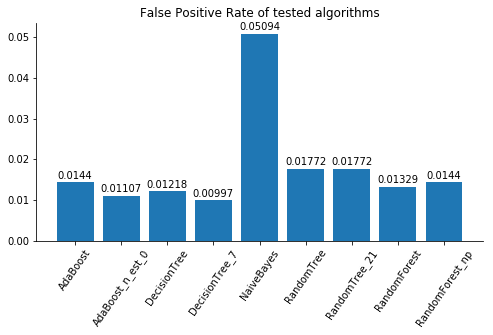

In [133]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")

In [134]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

num_trees = 182
seed = 12

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=182, random_state=seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
               "RandomForest":RandomForestClassifier(),
               "RandomForest_np":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0)
              }

#Acc = {}
#F1S = {}
#Prec = {}
#Rec = {}
#FPR = {}

for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: 

Algorithm: AdaBoost_scaled Accuracy: 0.99400, F1-score: 0.99572, Precision: 0.99382, Recall: 0.99762, FPR: 0.01440
TN: 890; FP:  13; FN:    5; TP: 2092



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarnin

Algorithm: AdaBoost_n_est_0_scaled Accuracy: 0.99600, F1-score: 0.99714, Precision: 0.99525, Recall: 0.99905, FPR: 0.01107
TN: 893; FP:  10; FN:    2; TP: 2095

Algorithm: DecisionTree_scaled Accuracy: 0.99267, F1-score: 0.99475, Precision: 0.99475, Recall: 0.99475, FPR: 0.01218
TN: 892; FP:  11; FN:   11; TP: 2086

Algorithm: DecisionTree_7_scaled Accuracy: 0.99533, F1-score: 0.99667, Precision: 0.99572, Recall: 0.99762, FPR: 0.00997
TN: 894; FP:   9; FN:    5; TP: 2092

Algorithm: NaiveBayes_scaled Accuracy: 0.97900, F1-score: 0.98487, Precision: 0.99178, Recall: 0.97806, FPR: 0.01883
TN: 886; FP:  17; FN:   46; TP: 2051

Algorithm: RandomTree_scaled Accuracy: 0.99167, F1-score: 0.99405, Precision: 0.99240, Recall: 0.99571, FPR: 0.01772
TN: 887; FP:  16; FN:    9; TP: 2088

Algorithm: RandomTree_21_scaled Accuracy: 0.99167, F1-score: 0.99405, Precision: 0.99240, Recall: 0.99571, FPR: 0.01772
TN: 887; FP:  16; FN:    9; TP: 2088

Algorithm: RandomForest_scaled Accuracy: 0.99533, F1-sc

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: Data

In [135]:
# plotting method definition

def plot_stats3(stat, name):
    fig, ax = plt.subplots(figsize=(16, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=55)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

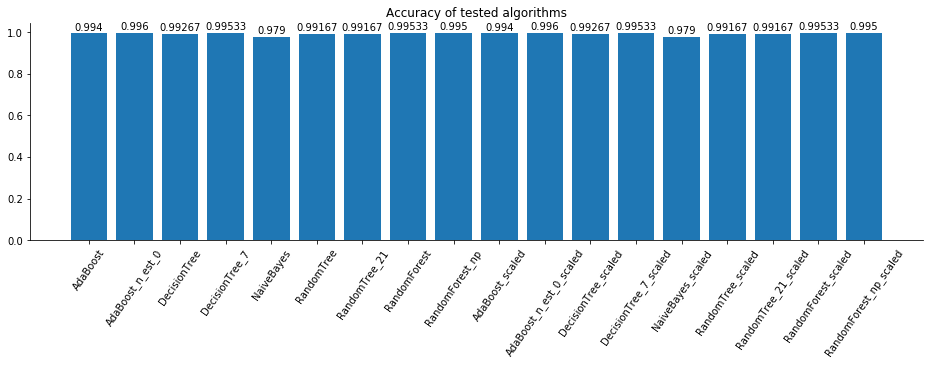

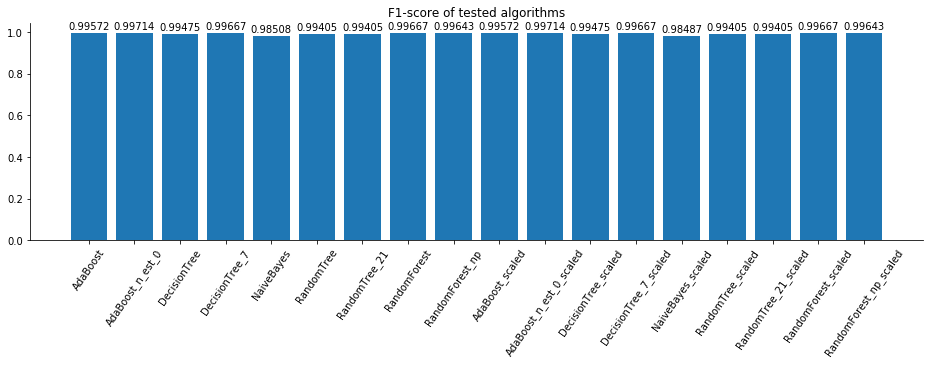

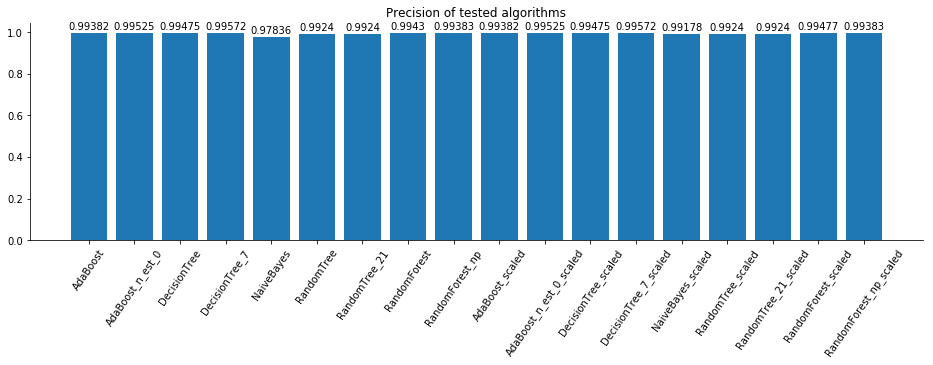

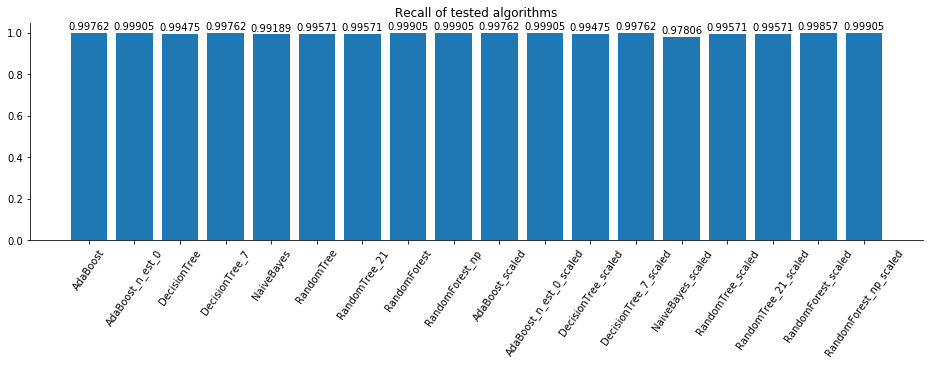

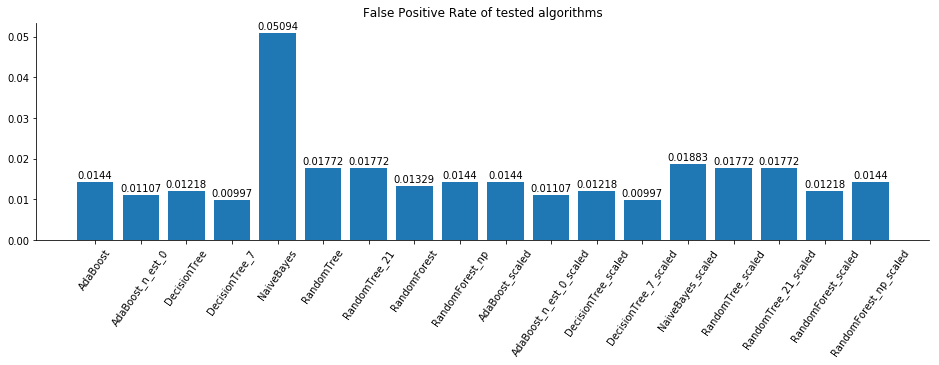

In [136]:
plot_stats3(Acc, "Accuracy")
plot_stats3(F1S, "F1-score")
plot_stats3(Prec, "Precision")
plot_stats3(Rec, "Recall")
plot_stats3(FPR, "False Positive Rate")